In [107]:
from keras.datasets import mnist     # Get MNIST dataset from Keras
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers for the model
from keras.utils import np_utils  # for converting array of labeled data to one-hot vector. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np                   # advanced math library
import random

In [108]:
df = pd.read_csv('/content/data.csv')

In [85]:
df

,X1,X2,X3,X4,X5,Y
0,23.18,27.2720,426.0,721.250000,0.004793,1
1,23.15,27.2675,429.5,714.000000,0.004783,1
2,23.15,27.2450,426.0,713.500000,0.004779,1
3,23.15,27.2000,426.0,708.250000,0.004772,1
4,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...
8138,21.05,36.0975,433.0,787.250000,0.005579,1
8139,21.05,35.9950,433.0,789.500000,0.005563,1
8140,21.10,36.0950,433.0,798.500000,0.005596,1
8141,21.10,36.2600,433.0,820.333333,0.005621,1


Splitting data into x and y. Where y is the target containing column named 'Y' above.

In [109]:
x = df.drop(['Y'], axis=1)
y = df['Y']

We can see that y consists of 2 classes: 0 and 1. 

In [124]:
y.unique()

array([1, 0])

Split x an y into training and testing using 80% train and 20% test.

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y ,
                                   random_state=0, 
                                   test_size=0.20, 
                                   )

For neural networks, we must normalize the data before fitting into the model: using min and max scaler for X data. Did not transform one hot for y because y consists of binary values: 0,1

In [111]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

In [89]:
X_train.shape

(4071, 5)

Constructing neural networks using sigmoid because the model will output only 1 number: either 1 or 0.

In [118]:
model = Sequential()
#this is our first hidden layer which has 20 neurons and input of 5 vectors
model.add(Dense(20, input_shape= (5,)))

model.add(Activation('relu'))
#we also add a dropout which helps combat against overfitting
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Then we have our final layer which outputs 1 class due to y being binary
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                120       
                                                                 
 activation_32 (Activation)  (None, 20)                0         
                                                                 
 dropout_23 (Dropout)        (None, 20)                0         
                                                                 
 dense_51 (Dense)            (None, 10)                210       
                                                                 
 activation_33 (Activation)  (None, 10)                0         
                                                                 
 dropout_24 (Dropout)        (None, 10)                0         
                                                                 
 dense_52 (Dense)            (None, 1)               

Instead of categorical_crossentropy, we'll use binary.

In [119]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

fit into Neural network model and splitting data for validation.

In [120]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
51/51 [==============================] - 1s 6ms/step - loss: 0.6617 - accuracy: 0.7610 - val_loss: 0.6236 - val_accuracy: 0.7759
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7909 - val_loss: 0.5369 - val_accuracy: 0.7753
Epoch 3/10
51/51 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.8070 - val_loss: 0.4252 - val_accuracy: 0.7901
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.3740 - accuracy: 0.8882 - val_loss: 0.2859 - val_accuracy: 0.9478
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9314 - val_loss: 0.1843 - val_accuracy: 0.9540
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9455 - val_loss: 0.1323 - val_accuracy: 0.9601
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 0.1492 - accuracy: 0.9566 - val_loss: 0.1095 - val_accuracy: 0.9626
Epoch 8/10
51/51 [==

We have achieve test data accuracy of 97%. And if we look at the iterations above, is comparing the accuracy of training and testing. It concludes that the model's testing and training is imporving together. At the last epoch, 10/10, we can see that both training and validation(test) achieve approximately same score.

In [121]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

51/51 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9718
Test loss: 0.0776805505156517
Test accuracy: 0.9717618227005005


Here is the loss function graph for training and testing. We can see that is slighlty overfitting.

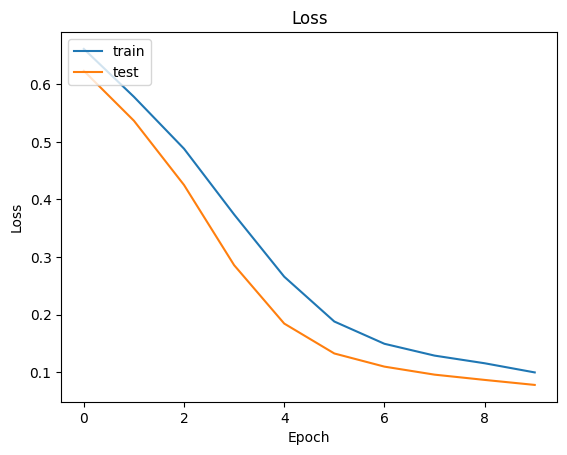

In [122]:
from keras.callbacks import History
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

What accuracy can you reach?
- Reach accuracy of 97%

Did you experience any overfitting or underfitting for your model? If yes, how did you fix it? (Please answer these in your jupyter notebook file.)
- Based on the graph, it showed that is slightly overfitting due to testing and training lines little far away from each other. The model is considered good if they are close to each other.